In [32]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

In [33]:
diabetes = load_diabetes()

In [34]:
x = diabetes.data
x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [35]:
y = diabetes.target
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [36]:
threshold = 150

In [37]:
yclass = (y > threshold).astype(int)

In [38]:
yclass

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [39]:
df_features = pd.DataFrame(x, columns=diabetes.feature_names)

In [40]:
df_target = pd.DataFrame(yclass, columns=['target'])


In [41]:
df = pd.concat([df_features, df_target], axis=1)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,1
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,1


In [42]:
X = df.drop('target',axis=1)
xtr,xte,ytr,yte = train_test_split(X,df['target'],test_size=0.2,random_state=42)

In [43]:
xtr,xte,ytr,yte

(          age       sex       bmi        bp        s1        s2        s3  \
 17   0.070769  0.050680  0.012117  0.056301  0.034206  0.049416 -0.039719   
 66  -0.009147  0.050680 -0.018062 -0.033213 -0.020832  0.012152 -0.072854   
 137  0.005383 -0.044642  0.049840  0.097615 -0.015328 -0.016345 -0.006584   
 245 -0.027310 -0.044642 -0.035307 -0.029770 -0.056607 -0.058620  0.030232   
 31  -0.023677 -0.044642 -0.065486 -0.081413 -0.038720 -0.053610  0.059685   
 ..        ...       ...       ...       ...       ...       ...       ...   
 106 -0.096328 -0.044642 -0.076264 -0.043542 -0.045599 -0.034821  0.008142   
 270  0.005383  0.050680  0.030440  0.083844 -0.037344 -0.047347  0.015505   
 348  0.030811 -0.044642 -0.020218 -0.005670 -0.004321 -0.029497  0.078093   
 435 -0.012780 -0.044642 -0.023451 -0.040099 -0.016704  0.004636 -0.017629   
 102 -0.092695 -0.044642  0.028284 -0.015999  0.036958  0.024991  0.056003   
 
            s4        s5        s6  
 17   0.034309  0.027364 

In [44]:
#defining our model
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y.to_numpy()  # Convert y_train to a numpy array
        
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return the most common class label
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtr)
X_test_scaled = scaler.transform(xte)

In [60]:
knn = KNN(k=3)
knn.fit(X_train_scaled, ytr)

In [61]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [62]:
#metrics of our model
from sklearn.metrics import classification_report
accuracy = accuracy_score(yte, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print('Precision:',precision_score(yte,y_pred))
print('Recall:',recall_score(yte,y_pred))
print('F1 Score',f1_score(yte,y_pred))
print('Matthews cor',matthews_corrcoef(yte,y_pred))
print(classification_report(yte, y_pred))


Accuracy: 0.70
Precision: 0.782608695652174
Recall: 0.45
F1 Score 0.5714285714285714
Matthews cor 0.39538524038849243
              precision    recall  f1-score   support

           0       0.67      0.90      0.77        49
           1       0.78      0.45      0.57        40

    accuracy                           0.70        89
   macro avg       0.72      0.67      0.67        89
weighted avg       0.72      0.70      0.68        89



In [63]:
# checking for the best K
best_accuracy = 0
best_k = 3
for k in range(1, 21):
    knn = KNN(k=k)
    knn.fit(X_train_scaled, ytr)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(yte, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k} with accuracy: {best_accuracy:.2f}")

Best k value: 1 with accuracy: 0.75


In [64]:
knn = KNN(k=best_k) #using the best K
knn.fit(X_train_scaled, ytr)
y_pred = knn.predict(X_test_scaled)

In [65]:
#metrics for the best k
print(f"Final Model Accuracy: {accuracy_score(yte, y_pred):.2f}")
print('Final Model Precision:',precision_score(yte,y_pred))
print('Final Model Recall:',recall_score(yte,y_pred))
print('Final Model F1 Score',f1_score(yte,y_pred))
print('Final Model Matthews cor',matthews_corrcoef(yte,y_pred))
print(classification_report(yte, y_pred))

Final Model Accuracy: 0.75
Final Model Precision: 0.75
Final Model Recall: 0.675
Final Model F1 Score 0.7105263157894738
Final Model Matthews cor 0.4979767497390903
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        49
           1       0.75      0.68      0.71        40

    accuracy                           0.75        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.75      0.75      0.75        89



In [66]:
#using sklearn library
model = KNeighborsClassifier(n_neighbors=3)

In [67]:
model.fit(X_train_scaled,ytr)

KNeighborsClassifier(n_neighbors=3)

In [68]:
pred2 = model.predict(X_test_scaled)
pred2

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [69]:
accuracy_score(yte,pred2)

0.6966292134831461

In [70]:
precision_score(yte,pred2)

0.782608695652174

In [71]:
recall_score(yte,pred2)

0.45

In [72]:
f1_score(yte,pred2)

0.5714285714285714

In [73]:
matthews_corrcoef(yte,pred2)

0.39538524038849243

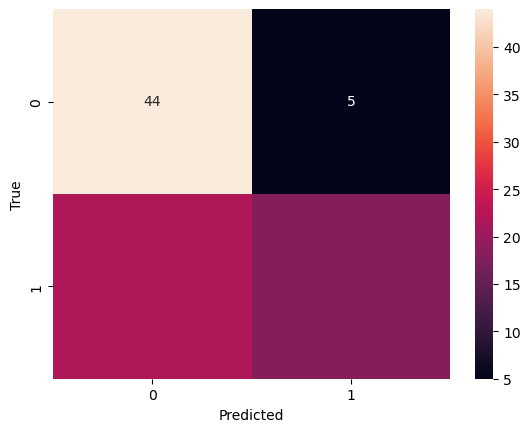

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
cf = confusion_matrix(yte,pred2)
sns.heatmap(cf,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()